In [54]:

import os
import json
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import sqlite3



import warnings
warnings.filterwarnings("ignore")


print(f'Current working directory: {os.getcwd()}')


Current working directory: /workspaces/Scientific-Programming_GroupProject


In [ ]:


# Get the S&P 500 company list from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url)[0]

# Filter for Technology sector
tech_companies = table[table['GICS Sector'] == 'Information Technology']
# Filter for health sector
health_companies = table[table['GICS Sector'] == 'Health Care']
# Filter for consumer discretionary sector
consumer_discretionary_companies = table[table['GICS Sector'] == 'Consumer Discretionary']
# Filter for consumer staples sector
consumer_staples_companies = table[table['GICS Sector'] == 'Consumer Staples']
# Filter for financials sector
financials_companies = table[table['GICS Sector'] == 'Financials']


# Get tickers
tech_tickers = tech_companies['Symbol'].tolist() 
health_tickers = health_companies['Symbol'].tolist()
consumer_discretionary_tickers = consumer_discretionary_companies['Symbol'].tolist()
consumer_staples_tickers = consumer_staples_companies['Symbol'].tolist()
financials_tickers = financials_companies['Symbol'].tolist()

print("Found tech companies:")
print(tech_tickers)

print("Found health companies:")
print(health_tickers)

print("Found consumer discretionary companies:")
print(consumer_discretionary_tickers)

print("Found consumer staples companies:")
print(consumer_staples_tickers)

print("Found financials companies:")
print(financials_tickers)


Found tech companies:
['ACN' 'ADBE' 'AMD' 'AKAM' 'APH' 'ADI' 'ANSS' 'AAPL' 'AMAT' 'ANET' 'ADSK'
 'AVGO' 'CDNS' 'CDW' 'CSCO' 'CTSH' 'GLW' 'CRWD' 'DELL' 'ENPH' 'EPAM'
 'FFIV' 'FICO' 'FSLR' 'FTNT' 'IT' 'GEN' 'GDDY' 'HPE' 'HPQ' 'IBM' 'INTC'
 'INTU' 'JBL' 'JNPR' 'KEYS' 'KLAC' 'LRCX' 'MCHP' 'MU' 'MSFT' 'MPWR' 'MSI'
 'NTAP' 'NVDA' 'NXPI' 'ON' 'ORCL' 'PLTR' 'PANW' 'PTC' 'QCOM' 'ROP' 'CRM'
 'STX' 'NOW' 'SWKS' 'SMCI' 'SNPS' 'TEL' 'TDY' 'TER' 'TXN' 'TRMB' 'TYL'
 'VRSN' 'WDC' 'WDAY' 'ZBRA']
Found health companies:
['ABT' 'ABBV' 'A' 'ALGN' 'AMGN' 'BAX' 'BDX' 'TECH' 'BIIB' 'BSX' 'BMY'
 'CAH' 'COR' 'CNC' 'CRL' 'CI' 'COO' 'CVS' 'DHR' 'DVA' 'DXCM' 'EW' 'ELV'
 'GEHC' 'GILD' 'HCA' 'HSIC' 'HOLX' 'HUM' 'IDXX' 'INCY' 'PODD' 'ISRG' 'IQV'
 'JNJ' 'LH' 'LLY' 'MCK' 'MDT' 'MRK' 'MTD' 'MRNA' 'MOH' 'PFE' 'DGX' 'REGN'
 'RMD' 'RVTY' 'SOLV' 'STE' 'SYK' 'TMO' 'UNH' 'UHS' 'VRTX' 'VTRS' 'WAT'
 'WST' 'ZBH' 'ZTS']
Found consumer discretionary companies:
['ABNB' 'AMZN' 'APTV' 'AZO' 'BBY' 'BKNG' 'CZR' 'KMX' 'CCL' 'CMG' 'DRI'

In [ ]:
for symbol in tech_tickers:
    ticker = yf.Ticker(symbol)

    try:
        # Print company name
        print(f"\nCompany: {ticker.info['longName']} ({symbol})")

        # Get historical data (last 1 month)
        hist = ticker.history(period="1mo")

        # Print first few rows
        print(hist[['Open', 'Close']].head())

    except Exception as e:
        print(f"❌ Error with {symbol}: {e}")
        
    for symbol in health_tickers:
        ticker = yf.Ticker(symbol)

        try:
            # Print company name
            print(f"\nCompany: {ticker.info['longName']} ({symbol})")

            # Get historical data (last 1 month)
            hist = ticker.history(period="1mo")

            # Print first few rows
            print(hist[['Open', 'Close']].head())

        except Exception as e:
            print(f"❌ Error with {symbol}: {e}")



Company: Accenture plc (ACN)
                                 Open       Close
Date                                             
2025-03-24 00:00:00-04:00  308.100006  307.179993
2025-03-25 00:00:00-04:00  307.549988  308.899994
2025-03-26 00:00:00-04:00  309.029999  311.160004
2025-03-27 00:00:00-04:00  309.220001  308.529999
2025-03-28 00:00:00-04:00  308.380005  304.329987

Company: Adobe Inc. (ADBE)
                                 Open       Close
Date                                             
2025-03-24 00:00:00-04:00  392.470001  394.470001
2025-03-25 00:00:00-04:00  393.570007  403.640015
2025-03-26 00:00:00-04:00  403.000000  397.809998
2025-03-27 00:00:00-04:00  397.440002  396.149994
2025-03-28 00:00:00-04:00  393.890015  385.709991

Company: Advanced Micro Devices, Inc. (AMD)
                                 Open       Close
Date                                             
2025-03-24 00:00:00-04:00  109.730003  113.849998
2025-03-25 00:00:00-04:00  113.269997  114.8099

In [56]:
# initialize SQLite database for Tech sotcks
conn = sqlite3.connect("tech_stocks.db")  # Creates tech_stocks.db file
cursor = conn.cursor()


🔍 Analyzing sector: Tech (Information Technology)
✓ Accenture plc (ACN) - 22 days
✓ Adobe Inc. (ADBE) - 22 days
✓ Advanced Micro Devices, Inc. (AMD) - 22 days
✓ Akamai Technologies, Inc. (AKAM) - 22 days
✓ Amphenol Corporation (APH) - 22 days
✓ Analog Devices, Inc. (ADI) - 22 days
✓ ANSYS, Inc. (ANSS) - 22 days
✓ Apple Inc. (AAPL) - 22 days
✓ Applied Materials, Inc. (AMAT) - 22 days
✓ Arista Networks Inc (ANET) - 22 days
✓ Autodesk, Inc. (ADSK) - 22 days
✓ Broadcom Inc. (AVGO) - 22 days
✓ Cadence Design Systems, Inc. (CDNS) - 22 days
✓ CDW Corporation (CDW) - 22 days
✓ Cisco Systems, Inc. (CSCO) - 22 days
✓ Cognizant Technology Solutions Corporation (CTSH) - 22 days
✓ Corning Incorporated (GLW) - 22 days
✓ CrowdStrike Holdings, Inc. (CRWD) - 22 days
✓ Dell Technologies Inc. (DELL) - 22 days
✓ Enphase Energy, Inc. (ENPH) - 22 days
✓ EPAM Systems, Inc. (EPAM) - 22 days
✓ F5, Inc. (FFIV) - 22 days
✓ Fair Isaac Corporation (FICO) - 22 days
✓ First Solar, Inc. (FSLR) - 22 days
✓ Fortinet, 

$BRK.B: possibly delisted; no price data found  (period=1mo) (Yahoo error = "No data found, symbol may be delisted")


✓ BlackRock, Inc. (BLK) - 22 days
✓ Blackstone Inc. (BX) - 22 days
✓ The Bank of New York Mellon Corporation (BK) - 22 days
✓ Brown & Brown, Inc. (BRO) - 22 days
✓ Capital One Financial Corporation (COF) - 22 days
✓ Cboe Global Markets, Inc. (CBOE) - 22 days
✓ The Charles Schwab Corporation (SCHW) - 22 days
✓ Chubb Limited (CB) - 22 days
✓ Cincinnati Financial Corporation (CINF) - 22 days
✓ Citigroup Inc. (C) - 22 days
✓ Citizens Financial Group, Inc. (CFG) - 22 days
✓ CME Group Inc. (CME) - 22 days
✓ Corpay, Inc. (CPAY) - 22 days
✓ Discover Financial Services (DFS) - 22 days
✓ Erie Indemnity Company (ERIE) - 22 days
✓ Everest Group, Ltd. (EG) - 22 days
✓ FactSet Research Systems Inc. (FDS) - 22 days
✓ Fidelity National Information Services, Inc. (FIS) - 22 days
✓ Fifth Third Bancorp (FITB) - 22 days
✓ Fiserv, Inc. (FI) - 22 days
✓ Franklin Resources, Inc. (BEN) - 22 days
✓ Global Payments Inc. (GPN) - 22 days
✓ Globe Life Inc. (GL) - 22 days
✓ The Goldman Sachs Group, Inc. (GS) - 22 d

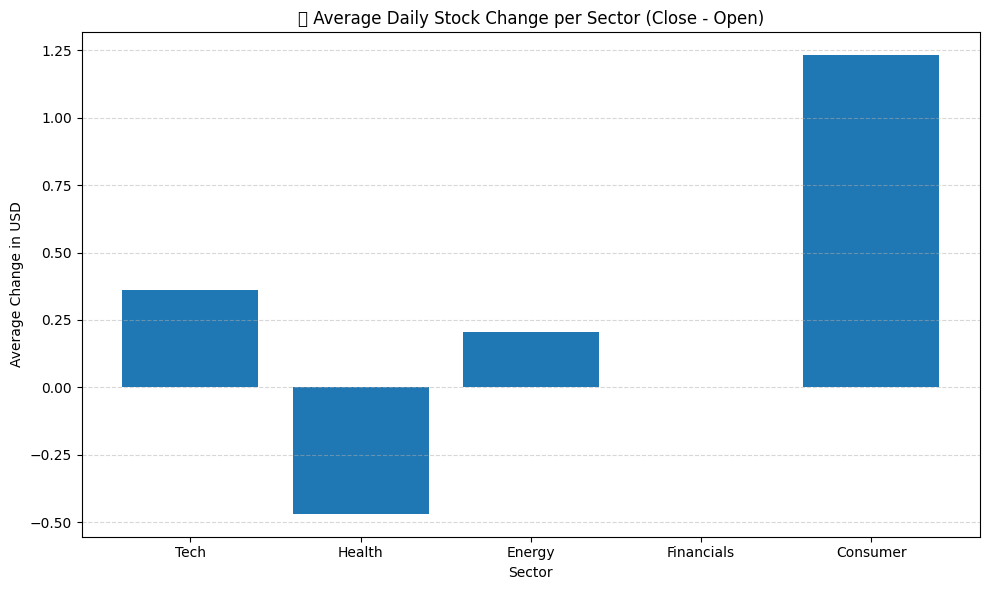

In [ ]:
# Load S&P 500 list
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
table = pd.read_html(url)[0]

# Choose sectors you want to compare
sectors_to_analyze = {
    "Tech": "Information Technology",
    "Health": "Health Care",
    "Energy": "Energy",
    "Financials": "Financials",
    "Consumer": "Consumer Discretionary"
}

# Store average changes
sector_averages = {}

# Loop through each sector
for label, sector_name in sectors_to_analyze.items():
    print(f"\n🔍 Analyzing sector: {label} ({sector_name})")
    companies = table[table['GICS Sector'] == sector_name]
    tickers = companies['Symbol'].tolist()

    all_changes = []

    for symbol in tickers:
        try:
            ticker = yf.Ticker(symbol)
            info = ticker.info
            hist = ticker.history(period="1mo")

            if hist.empty:
                continue

            hist['Change'] = hist['Close'] - hist['Open']
            all_changes.extend(hist['Change'].dropna().tolist())

            print(f"✓ {info.get('longName', symbol)} ({symbol}) - {len(hist)} days")

        except Exception as e:
            print(f"Error with {symbol}: {e}")

    if all_changes:
        avg_change = sum(all_changes) / len(all_changes)
        sector_averages[label] = avg_change
        print(f" Average change for {label}: {avg_change:.2f}")
    else:
        print(f" No data found for {label}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(sector_averages.keys(), sector_averages.values())
plt.title(" Average Daily Stock Change per Sector (Close - Open)")
plt.ylabel("Average Change in USD")
plt.xlabel("Sector")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [57]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1026-azure
Datetime: 2025-04-23 18:31:22
Python Version: 3.12.1
-----------------------------------
